In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
data = pd.read_csv('pokemon.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [11]:
data.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


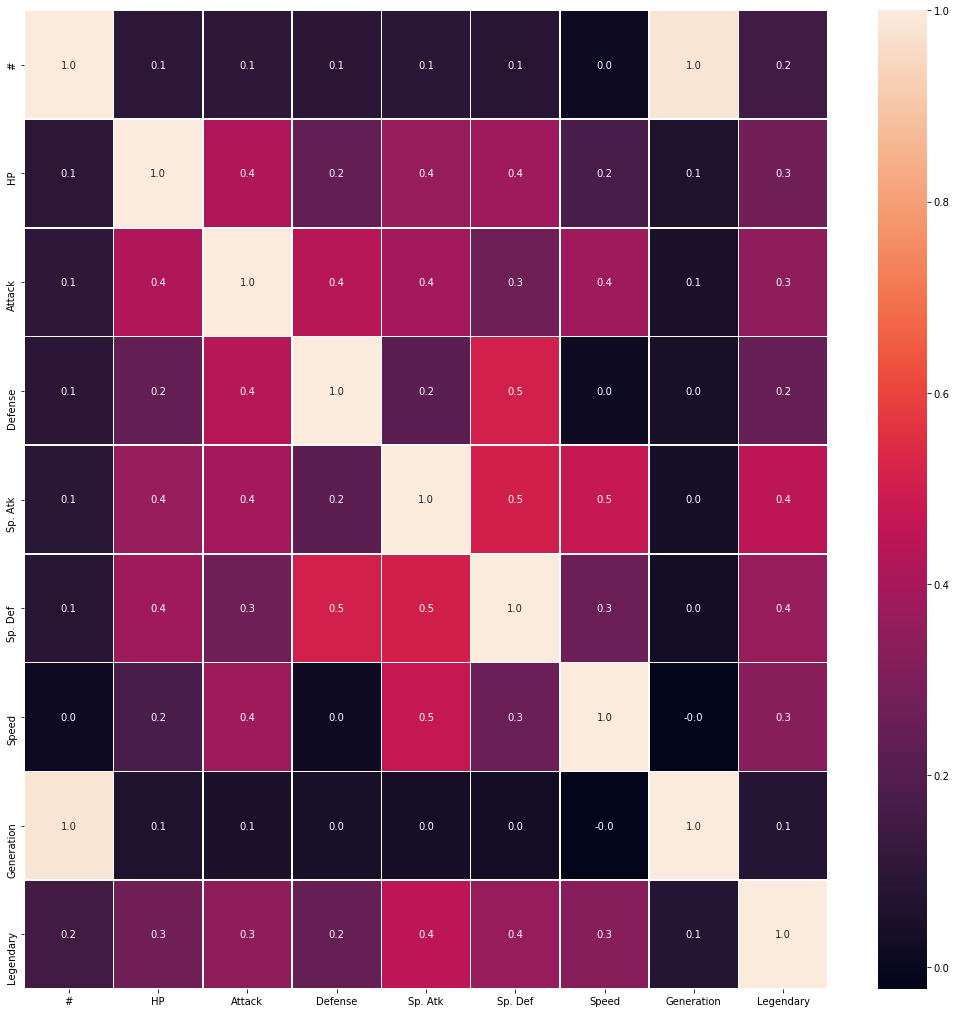

In [12]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Matplotlib

Matplot is a python library that help us to plot data. The easiest and basic plots are line, scatter and histogram plots.

* Line plot is better when x axis is time.
* Scatter is better when there is correlation between two variables
* Histogram is better when we need to see distribution of numerical data.
* Customization: Colors,labels,thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle

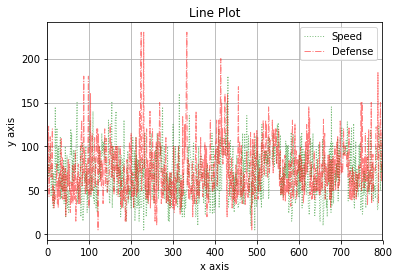

In [13]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.Speed.plot(kind='line', color='g', label='Speed', linewidth=1, 
                alpha=0.5, grid=True, linestyle=':')
data.Defense.plot(color='r', label='Defense', linewidth=1, 
                alpha=0.5, grid=True, linestyle='-.')
plt.legend(loc='upper right')    # legend = puts label into plot
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Line Plot')

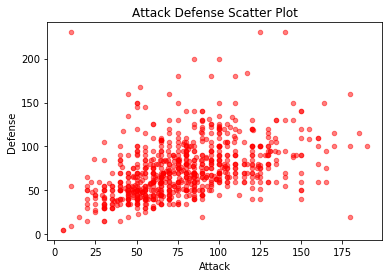

In [14]:
# Scatter Plot
data.plot(kind='scatter', x='Attack', y='Defense', alpha=0.5, color='r')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack Defense Scatter Plot')

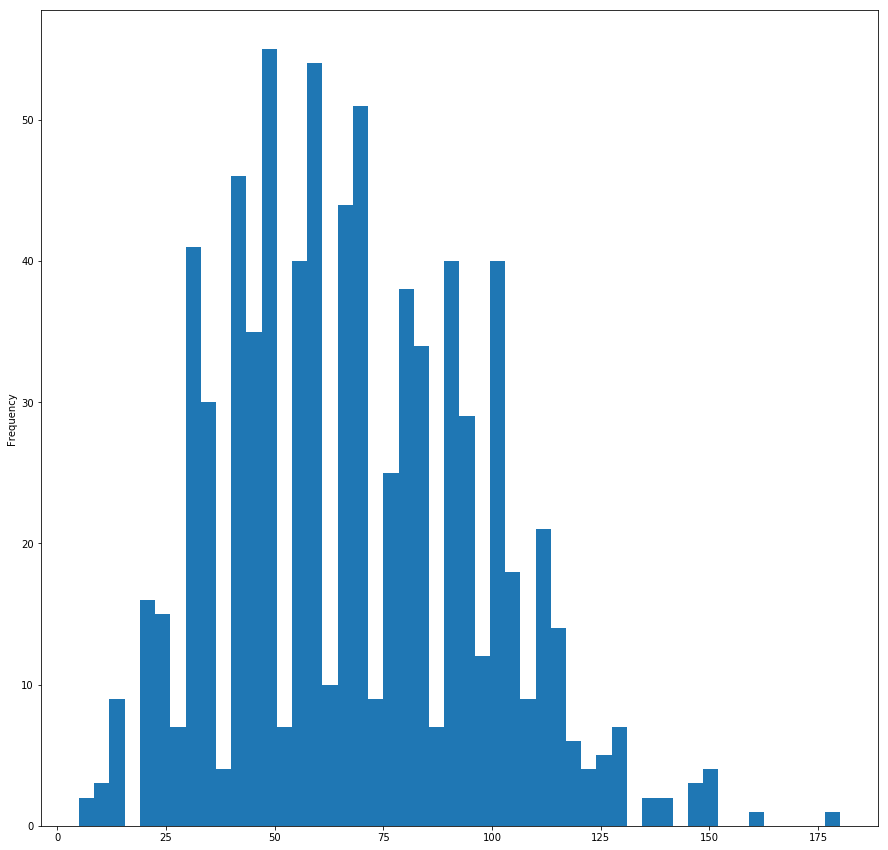

In [15]:
# Histogram
# bins = number of bar in figure
# 注意这是频率图
data.Speed.plot(kind='hist', bins=50, figsize=(15, 15))

In [18]:
# clf() = cleans it up again you can start a fresh
data.Speed.plot(kind = 'hist',bins = 50)
plt.clf()
# We cannot see plot due to clf()

In [25]:
threshold = sum(data.Speed)/len(data.Speed)
data["speed_level"] = ["high" if i > threshold else "low" for i in data.Speed]
data.loc[:10, ["speed_level", "Speed"]]

,speed_level,Speed
0,low,45
1,low,60
2,high,80
3,high,80
4,low,65
5,high,80
6,high,100
7,high,100
8,high,100
9,low,43


In [26]:
# 看每个第一属性有多少
print(data['Type 1'].value_counts(dropna=False))

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [27]:
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


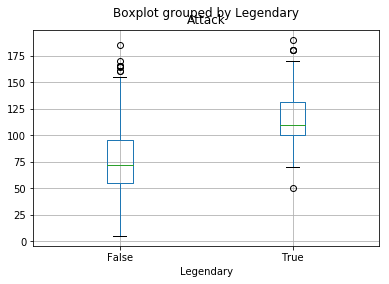

In [28]:
# 箱图
# For example: compare attack of pokemons that are legendary or not
# Black line at top is max
# Blue line at top is 75%
# Red line is median (50%)
# Blue line at bottom is 25%
# Black line at bottom is min
# There are no outliers
data.boxplot(column='Attack', by='Legendary')

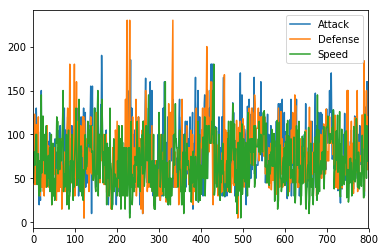

In [30]:
# Plotting all data
data1 = data.loc[:, ["Attack", "Defense", "Speed"]]
data1.plot()
# It is confusing

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a54ca90>,
      dtype=object)

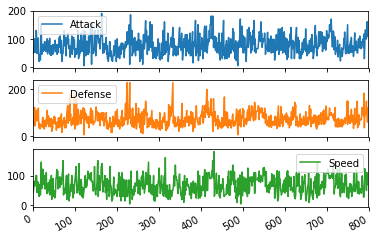

In [31]:
# subplots
data1.plot(subplots = True)

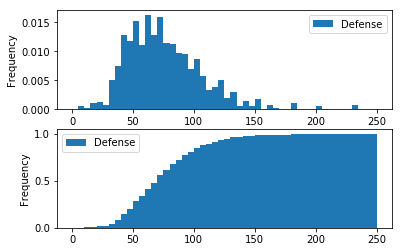

In [33]:
# histogram subplot with non cumulative and cumulative
fig, axes = plt.subplots(nrows=2, ncols=1)
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True,ax = axes[0])
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True,ax = axes[1],cumulative = True)